# Analysis CAT and NUM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv("./Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Univariate Analysis

In [3]:
new_telco = df[['Geography','Gender','Exited']]
new_telco.head(5)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


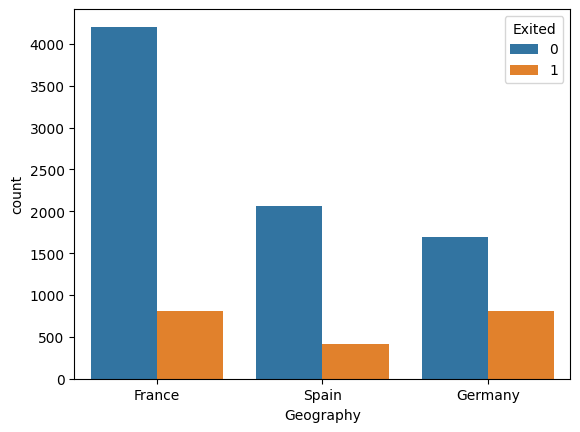

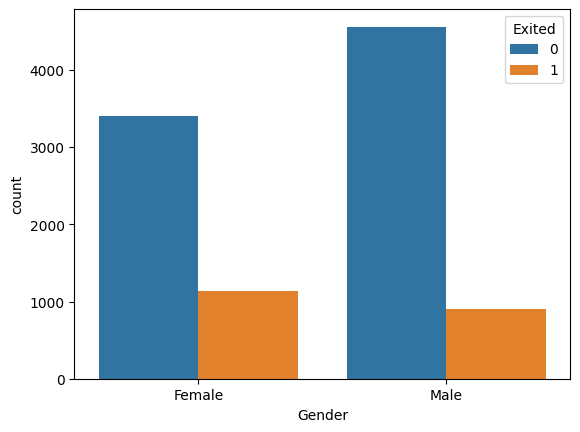

In [4]:
for i , predictor in enumerate(new_telco.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data = new_telco, x = predictor, hue = 'Exited')

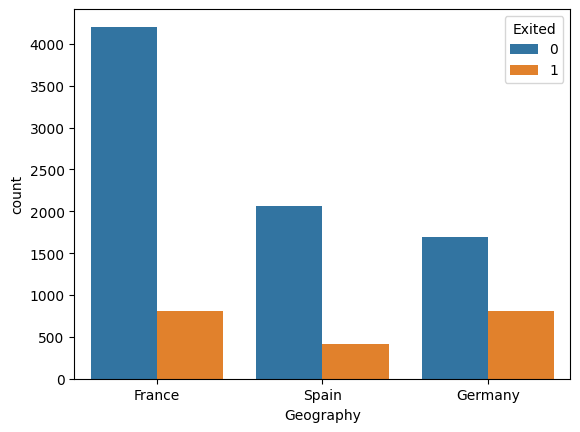

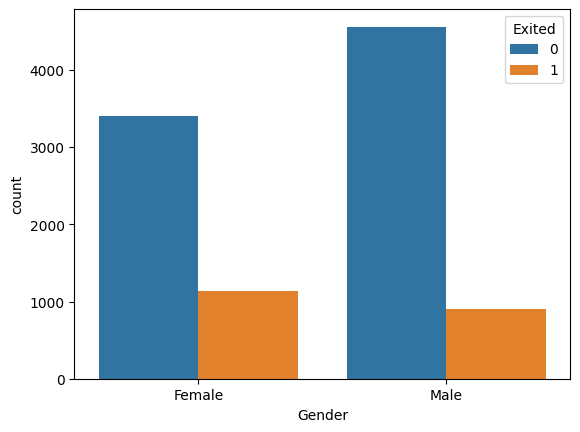

In [5]:
for i, predictor in enumerate(new_telco.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=new_telco,x=predictor, hue= 'Exited')
    plt.show()

In [6]:
new_telco.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Bivariate Analysis

<Axes: xlabel='Gender', ylabel='count'>

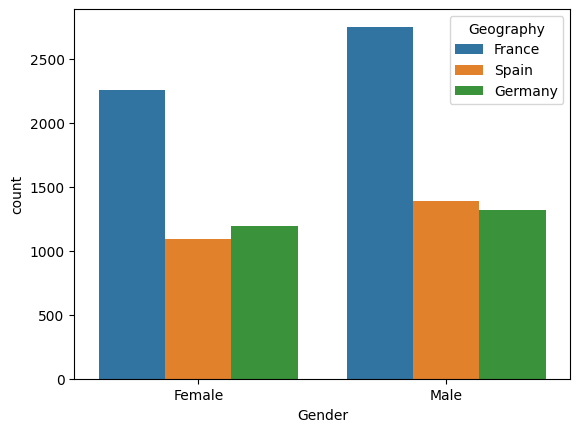

In [7]:
sns.countplot(data=new_telco,x='Gender',hue='Geography', stat="count")

In [8]:
n = new_telco.loc[new_telco['Exited']==1]
n

,Geography,Gender,Exited
0,France,Female,1
2,France,Female,1
5,Spain,Male,1
7,Germany,Female,1
16,Germany,Male,1
...,...,...,...
9981,Germany,Male,1
9982,Germany,Female,1
9991,France,Female,1
9997,France,Female,1


<Axes: xlabel='Geography', ylabel='Count'>

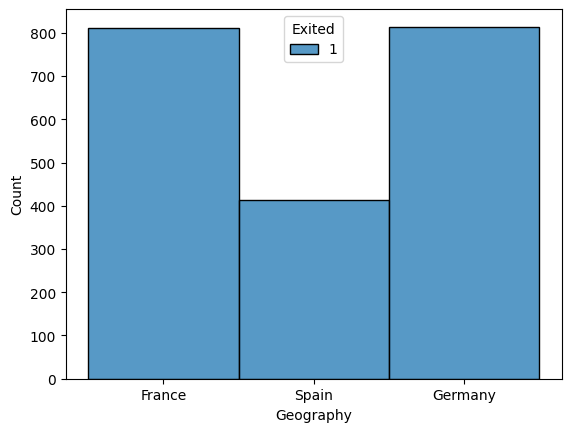

In [9]:
sns.histplot(data=n,x='Geography', hue='Exited', stat='count', multiple='dodge')

In [10]:
t = new_telco.loc[new_telco['Exited'] == 1]
t.head()

,Geography,Gender,Exited
0,France,Female,1
2,France,Female,1
5,Spain,Male,1
7,Germany,Female,1
16,Germany,Male,1


<Axes: xlabel='Geography', ylabel='count'>

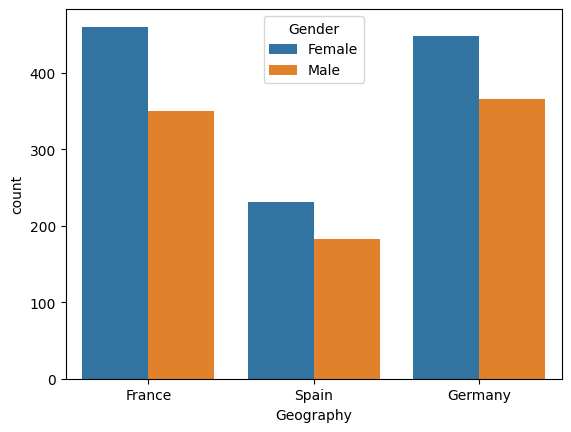

In [11]:
sns.countplot(data = t, x = 'Geography', hue = 'Gender', stat = 'count')

<Axes: xlabel='Geography', ylabel='count'>

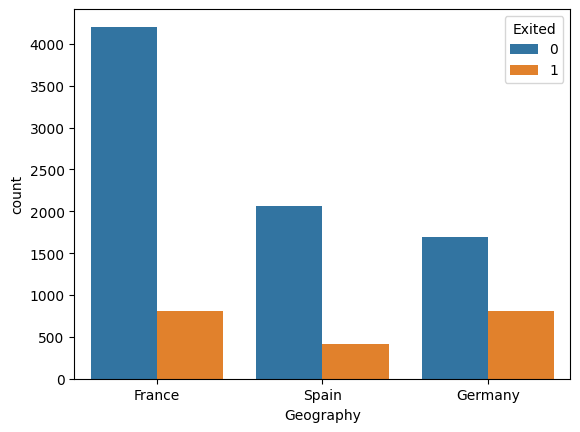

In [12]:
sns.countplot(data=new_telco,x='Geography',hue='Exited', stat='count')

# Numerical Analysis

## Correlation:  It range from -1 to 1.
- +1 --> Positive Correlation
- -1 --> Negative Correlation
- 0 --> No Correlation

In [13]:
telco_data = pd.read_csv("./Churn_Modelling.csv")
telco_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
telco_data_base = pd.DataFrame(data=telco_data,columns=['RowNumber','CustomerId','CreditScore','Age','Tenure','Balance','EstimatedSalary','Exited'])
telco_data_base

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,101348.88,1
1,2,15647311,608,41,1,83807.86,112542.58,0
2,3,15619304,502,42,8,159660.80,113931.57,1
3,4,15701354,699,39,1,0.00,93826.63,0
4,5,15737888,850,43,2,125510.82,79084.10,0
...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,96270.64,0
9996,9997,15569892,516,35,10,57369.61,101699.77,0
9997,9998,15584532,709,36,7,0.00,42085.58,1
9998,9999,15682355,772,42,3,75075.31,92888.52,1


In [15]:
telco_data_base.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,0.012797,0.118533
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,1.000000,0.012097
Exited,-0.016571,-0.006248,-0.027094,0.285323,-0.014001,0.118533,0.012097,1.000000


<Axes: >

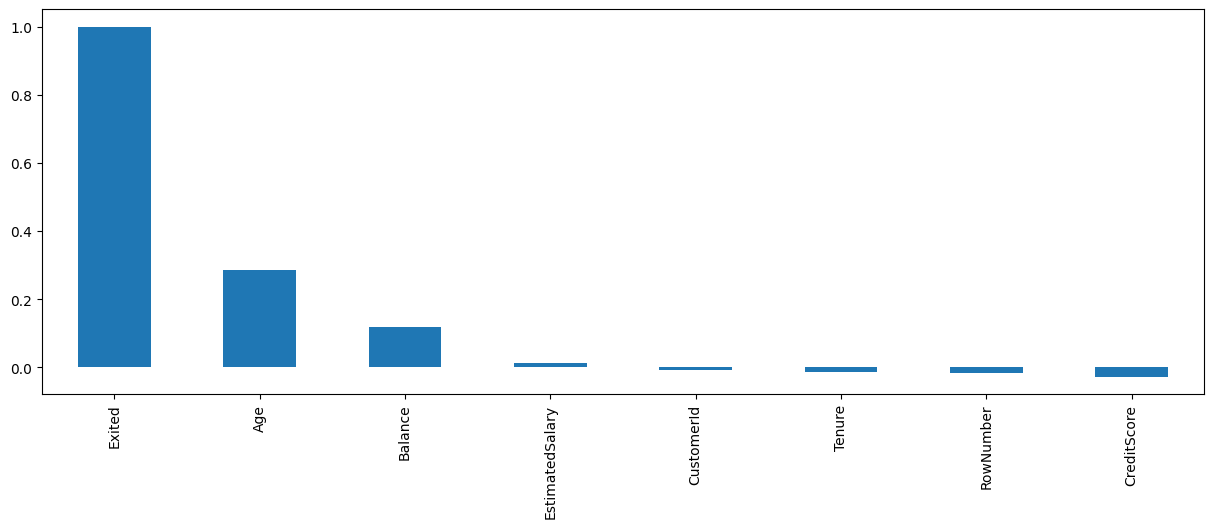

In [16]:
plt.figure(figsize=(15,5))
telco_data_base.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

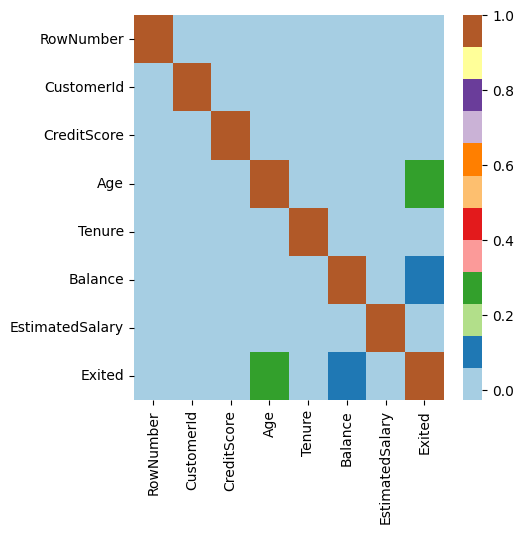

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(data=telco_data_base.corr(),cmap='Paired')

In [18]:
telco_data_base.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,101348.88,1
1,2,15647311,608,41,1,83807.86,112542.58,0
2,3,15619304,502,42,8,159660.80,113931.57,1
3,4,15701354,699,39,1,0.00,93826.63,0
4,5,15737888,850,43,2,125510.82,79084.10,0


In [19]:
telco_data_base['Tenure'].value_counts().sort_index(ascending=True)

Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: count, dtype: int64

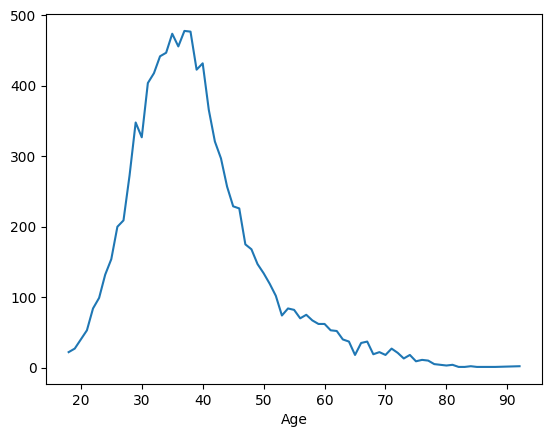

In [20]:
telco_data_base['Age'].value_counts().sort_index(ascending=True).plot()
plt.show()

In [21]:
new_d = telco_data_base.loc[telco_data_base['Exited']==1]
new_d

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,101348.88,1
2,3,15619304,502,42,8,159660.80,113931.57,1
5,6,15574012,645,44,8,113755.78,149756.71,1
7,8,15656148,376,29,4,115046.74,119346.88,1
16,17,15737452,653,58,1,132602.88,5097.67,1
...,...,...,...,...,...,...,...,...
9981,9982,15672754,498,42,3,152039.70,53445.17,1
9982,9983,15768163,655,46,7,137145.12,115146.40,1
9991,9992,15769959,597,53,4,88381.21,69384.71,1
9997,9998,15584532,709,36,7,0.00,42085.58,1


<Axes: xlabel='Age'>

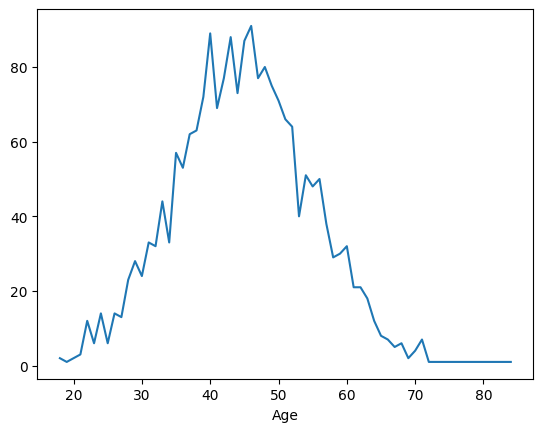

In [22]:
new_d['Age'].value_counts().sort_index(ascending=True).plot()

In [23]:
no_churn = df.loc[df['Exited']==0]
no_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


<Axes: xlabel='Age'>

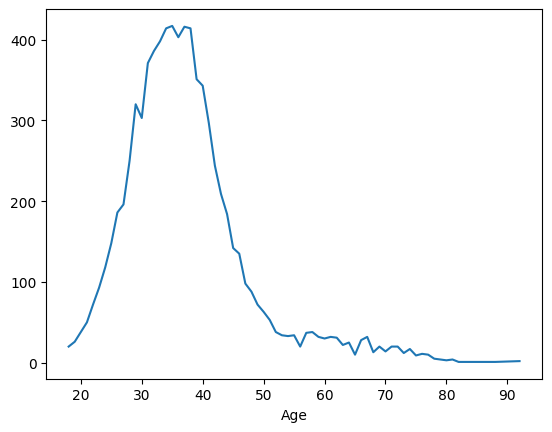

In [24]:
no_churn['Age'].value_counts().sort_index(ascending=True).plot()

In [25]:
n

,Geography,Gender,Exited
0,France,Female,1
2,France,Female,1
5,Spain,Male,1
7,Germany,Female,1
16,Germany,Male,1
...,...,...,...
9981,Germany,Male,1
9982,Germany,Female,1
9991,France,Female,1
9997,France,Female,1
